In [1]:
import pandas as pd
import folium
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re
%matplotlib inline

In [2]:
data = pd.read_excel('cleaned_data.xlsx') 

In [3]:
data['Price']=pd.to_numeric(data['Price'].str.replace(',',''))

In [4]:
def convert_to_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    return value

data['Price_per_unit_area'] = data['Price_per_unit_area'].apply(convert_to_numeric)

In [5]:
data['Size'] = pd.to_numeric(data['Size'].str.replace(' sq ft', '').str.replace(',', ''))

# Task-1: 

## Splitting Overall opportunities into three ranges using percentile splitting

In [6]:
percentiles = [25, 75]
percentile_values = data['Price'].quantile([p / 100 for p in percentiles])

def categorize_price_percentile(price):
    if price <= percentile_values.iloc[0]:
        return 'Low'
    elif price <= percentile_values.iloc[1] and price >percentile_values.iloc[0]:
        return 'Medium'
    else:
        return 'High'

data['Budget_Category'] = data['Price'].apply(categorize_price_percentile)
data['Price_Category'] = data['Price'].apply(categorize_price_percentile)
budget_distribution = data['Budget_Category'].value_counts()

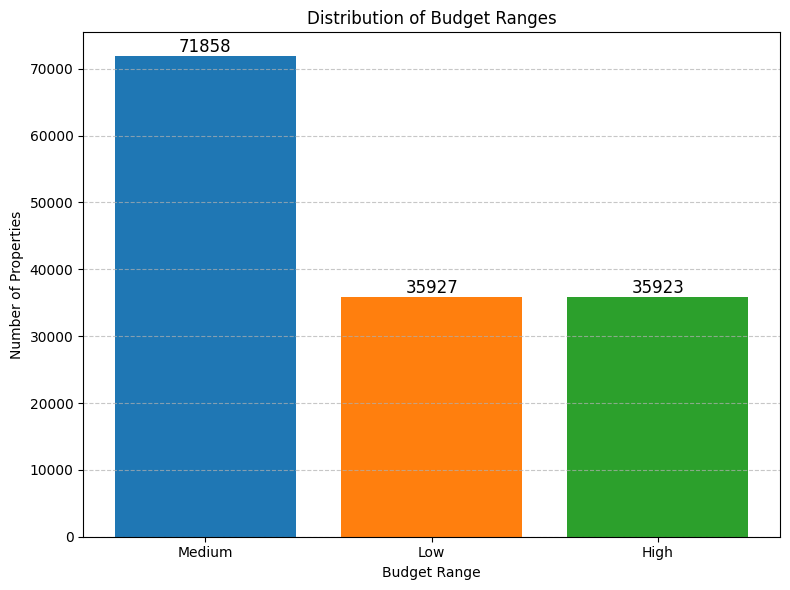

In [7]:
plt.figure(figsize=(8, 6))
bars = plt.bar(budget_distribution.index, budget_distribution.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Budget Range')
plt.ylabel('Number of Properties')
plt.title('Distribution of Budget Ranges')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)  
plt.tight_layout()
plt.savefig('bar_budget.jpg')
plt.show()

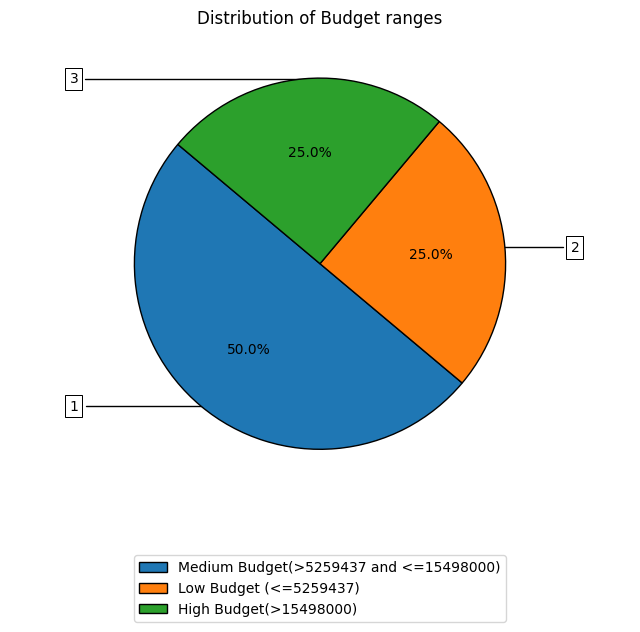

In [8]:
fig, ax= plt.subplots(figsize=(8,8))
plt.subplots_adjust(bottom=0.3)
total = budget_distribution.values
plt.title('Distribution of Budget ranges')
plt.gca().axis("equal")
patches, texts, autotexts = pie = plt.pie(total, startangle=140, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
labels =['Medium Budget(>5259437 and <=15498000)','Low Budget (<=5259437)','High Budget(>15498000)']

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords='data',arrowprops=arrowprops, 
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(patches):
    ang = (p.theta2 - p.theta1)/2.+p.theta1
    y = np.sin(ang/180.*np.pi)
    x = 1.35*np.sign(np.cos(ang/180.*np.pi))
    plt.gca().annotate(str(1+i), xy=(0, 0), xytext=( x, y), **kw )

plt.legend(pie[0],labels, loc="center", bbox_to_anchor=(0.5,-0.2))
plt.savefig("pie_budget.png")
plt.show()

# <u>Analysis of Budget Range Distribution</u>

## <u>Data Overview</u>

We were provided with house prices for investment, and we have categorized them into different budget ranges based on percentile splitting method

<u>Budget Range Distribution</u>


<table><tr>
    <td><img src="https://i.ibb.co/VJnMnjG/bar-budget.jpg" width=450px></td>
    <td> <img src="https://i.ibb.co/HNN92Zc/pie-budget.png"  width=450px></td>
</tr></table>>

From the visualization, we can observe the following:
1. Majority of the house prices fall into the "Medium Budget" range, indicating a significant number of affordable investment opportunities.
2. There are a few investments in the "Low Budget" as well as "High Budget" range, suggesting a smaller but still noteworthy segment of opportunities in these ranges.

## Inferences

- **Investment Distribution**: The distribution of investments across budget ranges suggests that there are good opportunities catering to different investor budget limits.
- **Affordability**: The higher concentration of investments in the "Medium Budget" range indicates a higher number of affordable options for investors who might have more limited budget constraints, like those who can't afford higher budgets and can afford more than lower budget ranges.
- **Potential Returns**: While "High Budget" opportunities are limited, they might offer higher potential returns due to their exclusivity and potentially premium locations or features. Similarly, "Low Budget" opportunities share some similarities with "High Budget" opportunities but with lower potential returns compared to the "High Budget" potential returns.
- **Investor Strategy**: Investors with varying budget constraints could consider a mix of opportunities across different budget ranges to diversify their portfolio and manage risk.


# TASK-2

## High level summary of the whole data using the budget range dimensions



In [9]:
data_low = data[data['Budget_Category'] == 'Low']
data_high= data[data['Budget_Category'] == 'High']
data_Medium= data[data['Budget_Category'] == 'Medium']

In [10]:
def circle_to_map(data,filename):
    center_coords = [data['Latitude'].mean(), data['Longitude'].mean()]
    map_center = folium.Map(location=center_coords, zoom_start=5)
    for index, row in data.iterrows():
        circle = folium.CircleMarker(location=(row['Latitude'], row['Longitude']),
                                 radius=1,  
                                 color='blue',
                                 fill=True,
                                 fill_color='blue')
        circle.add_to(map_center)
    display(map_center)
    map_center.save(filename)

## Inference:
This maps highlights the distribution of properties across different budget categories - Low, Medium, and High. Blue circles represent property locations. From this map, we can observe that properties across all budget categories are spread out across different cities. So Investors can easily select which place have higher chances to invest.

<table>
    <tr>
        <td>
            <h1>Low Budget Category Locations</h1>
            <img src="https://i.ibb.co/QPX2rTF/data-low.png">
        </td>
    </tr>
     <tr>
          <td>
              <h1>High Budget Category Locations</h1>
             <img src="https://i.ibb.co/D9NNVG4/data-high.png">
        </td>
    </tr>
    <tr>
        <td>
            <h1>Medium Budget Category Locations</h1>
            <img src="https://i.ibb.co/pJy6KTR/data-medium.png">
         </td>
    </tr>  
</table>

### You can run this code  to know how mapping works

In [11]:
# circle_to_map(data_low)
# circle_to_map(data_Medium)
# circle_to_map(data_high)

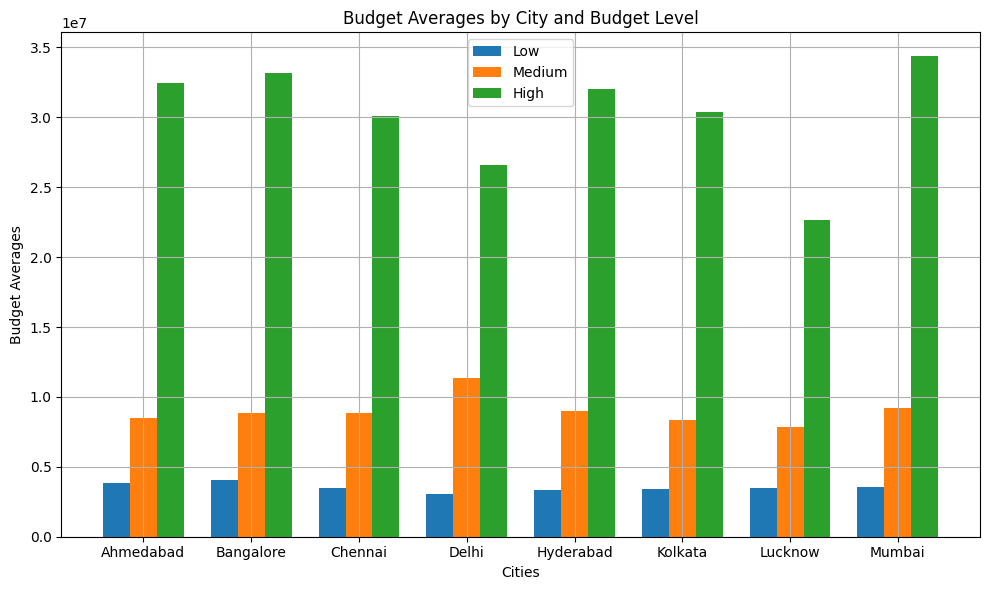

In [12]:
data_low_avg=data_low.groupby('City_name')[['Price']].mean().reset_index()
data_low_avg = data_low_avg.rename(columns={'Price': 'low_budget_average'})

data_medium_avg=data_Medium.groupby('City_name').agg({'Price': 'mean', 'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
data_medium_avg = data_medium_avg.rename(columns={'Price': 'medium_budget_average'})

data_high_avg=data_high.groupby('City_name')[['Price']].mean().reset_index()
data_high_avg = data_high_avg.rename(columns={'Price': 'high_budget_average'})

total_city=data_low_avg.merge(data_medium_avg,on="City_name",how="inner")
total_city=total_city.merge(data_high_avg,on="City_name",how="inner")

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = total_city.index

low_bars = ax.bar(index, total_city['low_budget_average'], bar_width, label='Low')
medium_bars = ax.bar(index + bar_width, total_city['medium_budget_average'], bar_width, label='Medium')
high_bars = ax.bar(index + 2 * bar_width, total_city['high_budget_average'], bar_width, label='High')

ax.set_xlabel('Cities')
ax.set_ylabel('Budget Averages')
ax.set_title('Budget Averages by City and Budget Level')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(total_city['City_name'])
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Inferences:
This visualization shows Budget averages in each city
- All Budget Investors have each opportunities in every city. We can finalize which city is best for individual budget investors
- So far now we can see every budget level investor have some sort iof equal opportunities

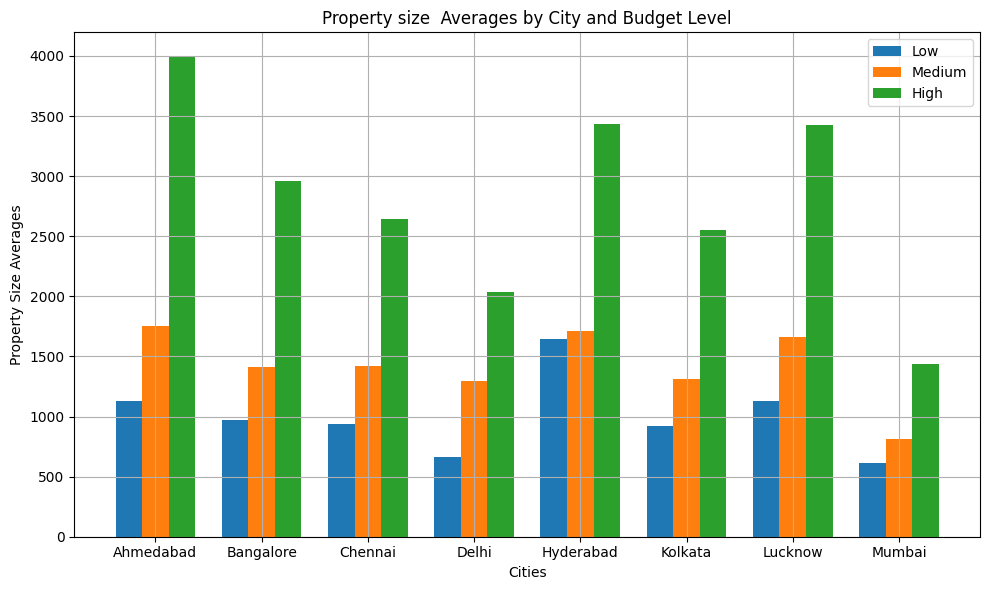

In [13]:
data_lows_avg=data_low.groupby('City_name')[['Size']].mean().reset_index()
data_lows_avg = data_lows_avg.rename(columns={'Size': 'low_size_average'})

data_mediums_avg=data_Medium.groupby('City_name').agg({'Size': 'mean', 'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
data_mediums_avg = data_mediums_avg.rename(columns={'Size': 'medium_size_average'})

data_highs_avg=data_high.groupby('City_name')[['Size']].mean().reset_index()
data_highs_avg = data_highs_avg.rename(columns={'Size': 'high_size_average'})

total_size=data_lows_avg.merge(data_mediums_avg,on="City_name",how="inner")
total_size=total_size.merge(data_highs_avg,on="City_name",how="inner")

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = total_city.index

low_bars = ax.bar(index, total_size['low_size_average'], bar_width, label='Low')
medium_bars = ax.bar(index + bar_width, total_size['medium_size_average'], bar_width, label='Medium')
high_bars = ax.bar(index + 2 * bar_width, total_size['high_size_average'], bar_width, label='High')

ax.set_xlabel('Cities')
ax.set_ylabel('Property Size Averages')
ax.set_title('Property size  Averages by City and Budget Level')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(total_size['City_name'])
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Inferences from the Property size  Averages by City and Budget Levels 
- We can Observe For Low Budget investors Hyderabad and Ahmedabad is best choice 
- For Medium Budget Investors all cities have equal opportunities expect Mumbai , Mumbai is not best choice for the all budget level investors unless there is no competition in mumbai for investing
- For High Budget Investors Ahmedabad , Hyderabad and Lucknow is best choices unless there is no competetion in those cities                                                                                                                                                                                     

In [14]:
center_coords = [total_city['Latitude'].mean(), total_city['Longitude'].mean()]
marker_cluster = folium.Map(location=center_coords, zoom_start=5)
for index, row in total_city.iterrows():
    row['low_budget_average']=int(round(row['low_budget_average']))
    row['medium_budget_average']=int(round(row['medium_budget_average']))
    row['high_budget_average']=int(round(row['high_budget_average']))
    popup_content = f"""
    <div style="display:flex ">
        <b>City</b>: {row['City_name']} <br>
        <b>Low Budget:</b> {row['low_budget_average']}<br>
        <b>Medium Budget:</b> {row['medium_budget_average']}<br>
        <b>High Budget:</b> {row['high_budget_average']}
    </div>
    """
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=popup_content,
                  icon=folium.Icon(color='blue')).add_to(marker_cluster)
    
    marker_cluster.save("Overview_map,html")

display(marker_cluster)

## Inferences :
From this map section we can easily see low budget,medium budget and high budget averages in each city on clicking that map location it is easy to see if investors want the exact count

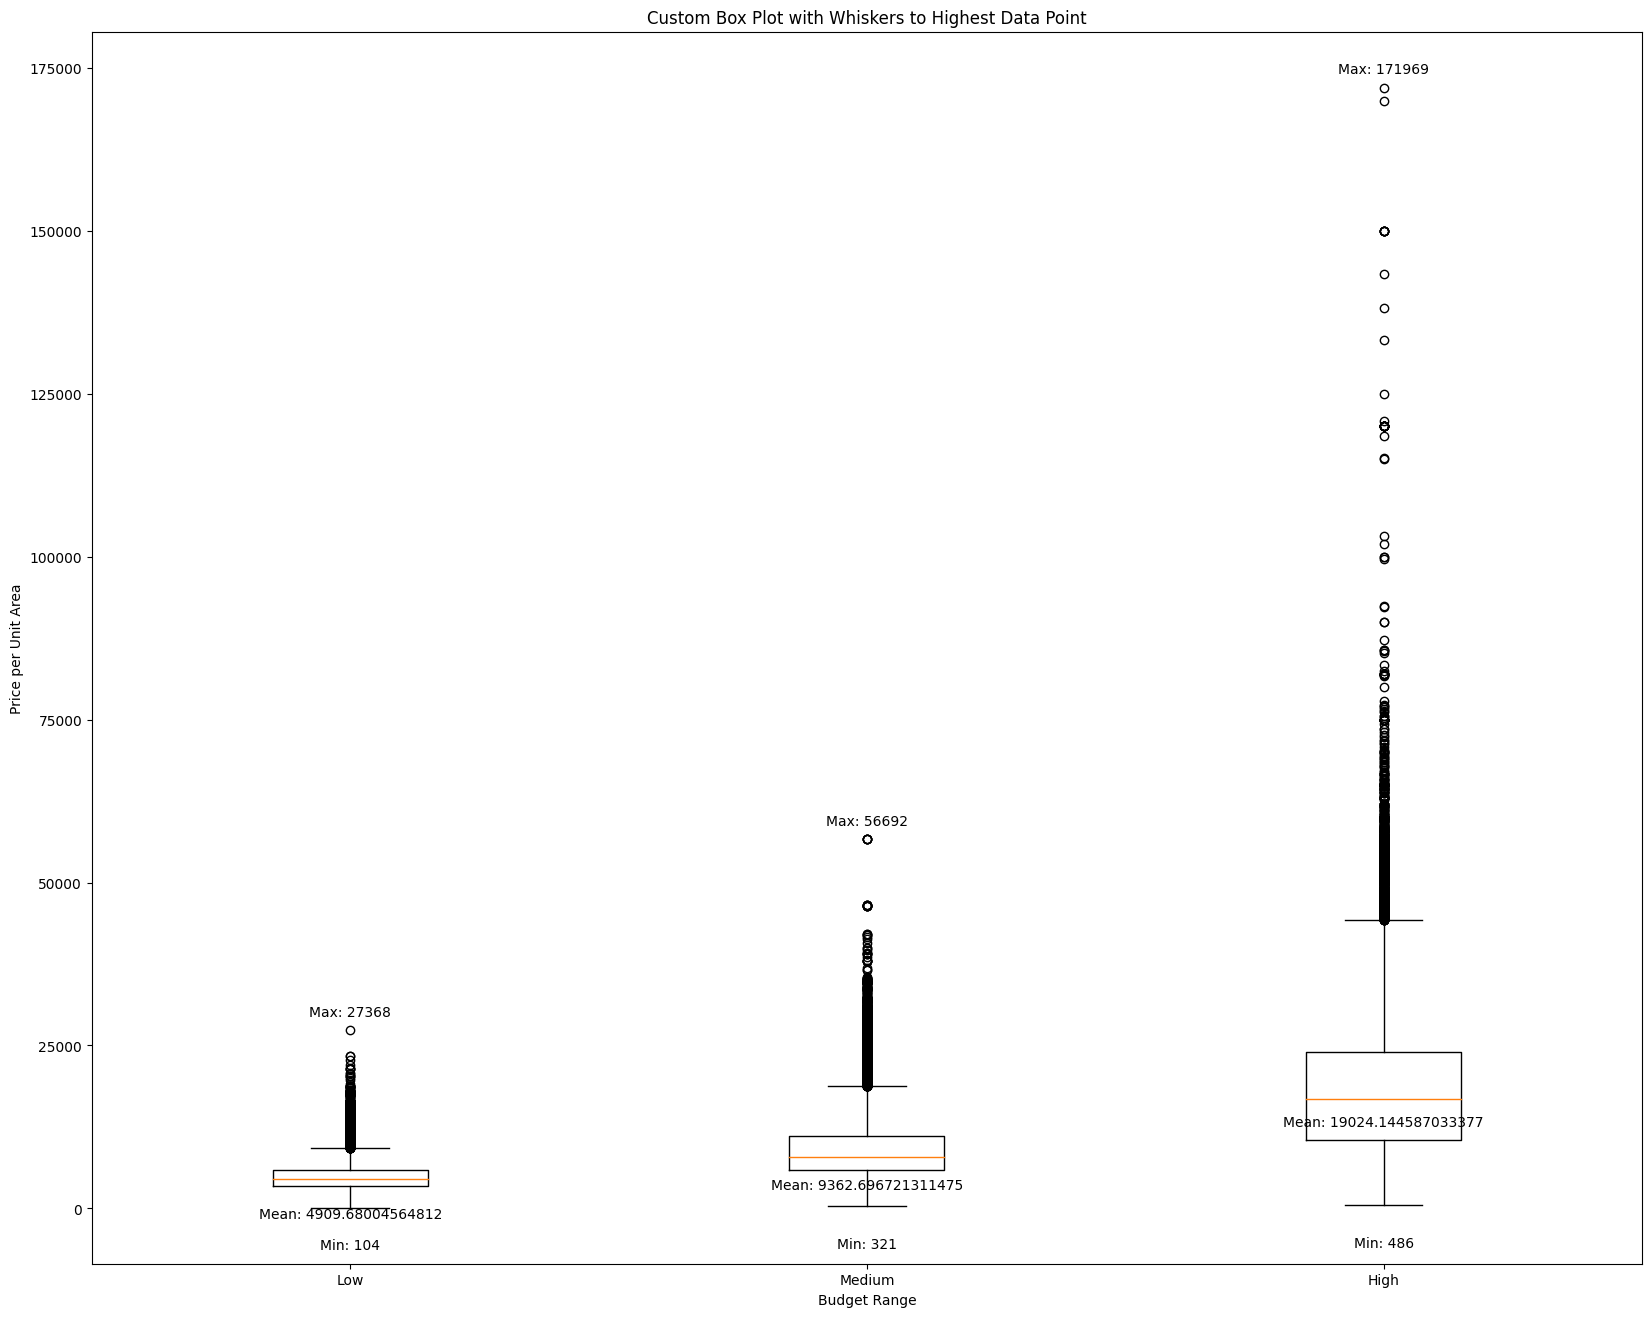

In [15]:
max_values = [
    data_low['Price_per_unit_area'].max(),
    data_Medium['Price_per_unit_area'].max(),
    data_high['Price_per_unit_area'].max()
]

mean_values = [
    data_low['Price_per_unit_area'].mean(),
    data_Medium['Price_per_unit_area'].mean(),
    data_high['Price_per_unit_area'].mean()
]

min_values = [
    data_low['Price_per_unit_area'].min(),
    data_Medium['Price_per_unit_area'].min(),
    data_high['Price_per_unit_area'].min()
]
plt.figure(figsize=(20, 16))
custom_box_plot = plt.boxplot(
    [data_low['Price_per_unit_area'],
     data_Medium['Price_per_unit_area'],
     data_high['Price_per_unit_area']],
    labels=['Low', 'Medium', 'High'],
)
plt.xlabel('Budget Range')
plt.ylabel('Price per Unit Area')
plt.title('Custom Box Plot with Whiskers to Highest Data Point')
for i, max_val in enumerate(max_values):
    plt.annotate(f'Max: {max_val:}', (i + 1, max_val), textcoords="offset points", xytext=(0, 10), ha='center')


for i, mean_val in enumerate(mean_values):
    plt.annotate(f'Mean: {mean_val:}', (i + 1, mean_val), textcoords="offset points", xytext=(0, -30), ha='center')


for i, min_val in enumerate(min_values):
    plt.annotate(f'Min: {min_val:}', (i + 1, min_val), textcoords="offset points", xytext=(0, -30), ha='center')

plt.show()

## Inferences from Box plot:
From Box plots we can see for each budget range price per unit area minimum price, maximum price and average price and other dots are outliers so Investors can go for the maximum price without outliers  and consider that has reasonable highest price in their selected budget. SO this helps Investors to correct investment according to their budget.  

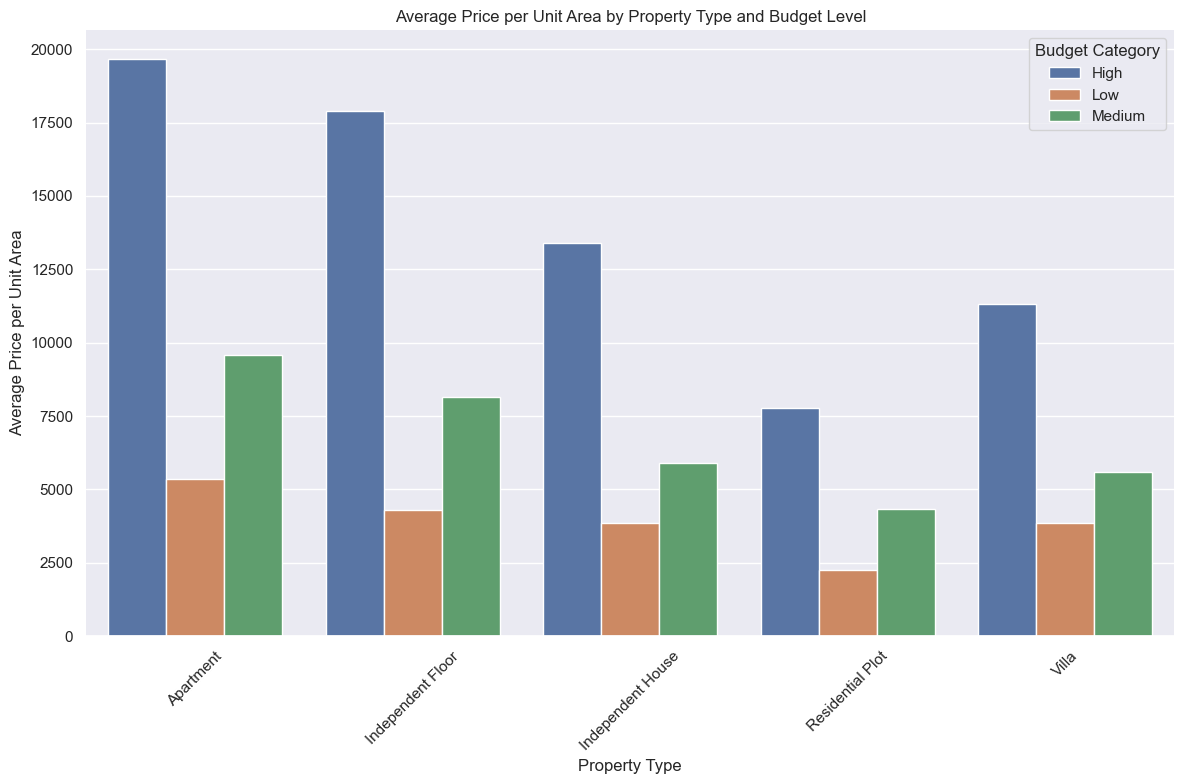

In [16]:
sns.set(style="darkgrid", context="notebook")
property_prices_by_budget = data.groupby(['Budget_Category', 'Property_type'])['Price_per_unit_area'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Property_type', y='Price_per_unit_area', hue='Budget_Category', data=property_prices_by_budget)
plt.xlabel('Property Type')
plt.ylabel('Average Price per Unit Area')
plt.title('Average Price per Unit Area by Property Type and Budget Level')
plt.xticks(rotation=45)
plt.legend(title='Budget Category')
sns.despine(left=True) 
plt.tight_layout()
plt.show()

## Inferences : 
Average Price per Unit Area by Property Type and Budget Level, It shows if Investors want to invest in less to get higher profit they can go with the residential plot , villas. It helps Investors to go with according to their desire and their budget.

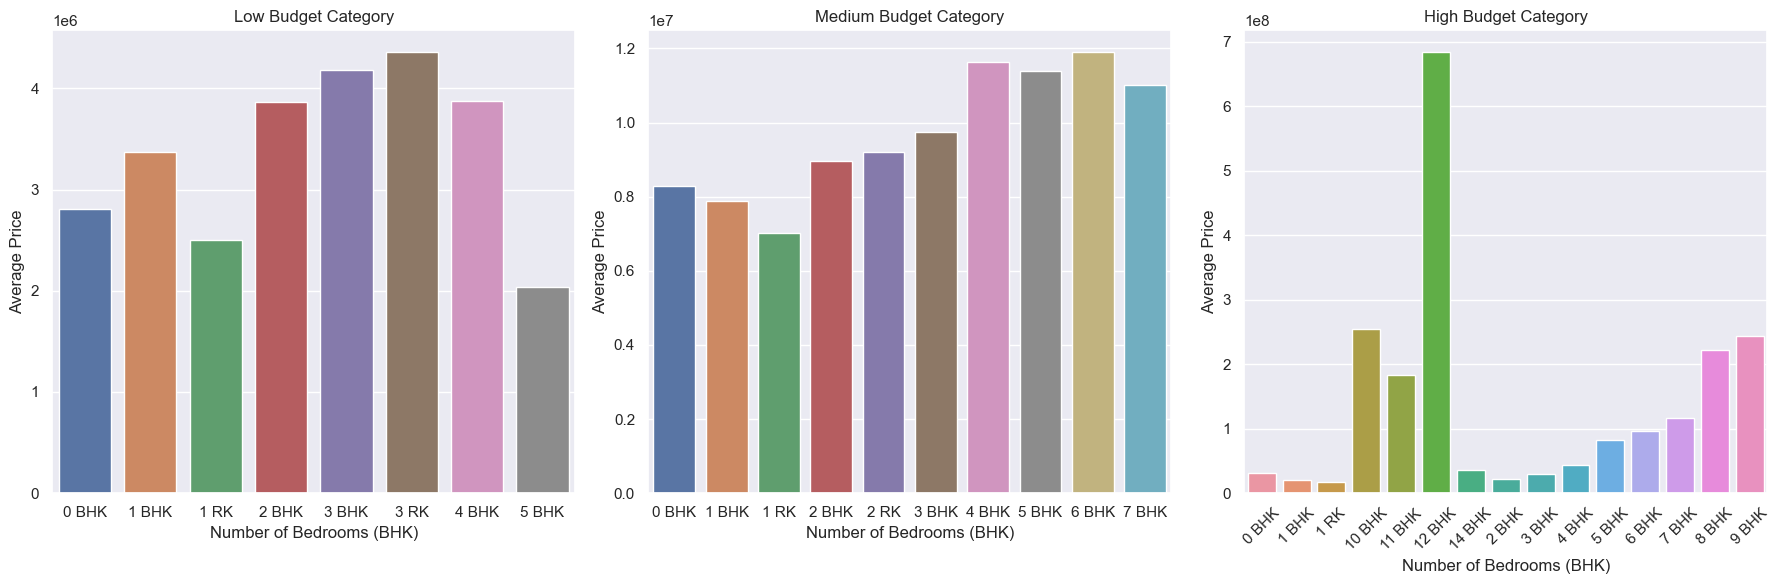

In [17]:
price_low_by_bhk = data_low.groupby('No_of_BHK')['Price'].mean().reset_index()
price_medium_by_bhk = data_Medium.groupby('No_of_BHK')['Price'].mean().reset_index()
price_high_by_bhk = data_high.groupby('No_of_BHK')['Price'].mean().reset_index()

# Create subplots with 3 separate grouped bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Low Budget Category
sns.barplot(x='No_of_BHK', y='Price', data=price_low_by_bhk, ax=axes[0])
axes[0].set_title('Low Budget Category')
axes[0].set_xlabel('Number of Bedrooms (BHK)')
axes[0].set_ylabel('Average Price')

# Medium Budget Category
sns.barplot(x='No_of_BHK', y='Price', data=price_medium_by_bhk, ax=axes[1])
axes[1].set_title('Medium Budget Category')
axes[1].set_xlabel('Number of Bedrooms (BHK)')
axes[1].set_ylabel('Average Price')

# High Budget Category
sns.barplot(x='No_of_BHK', y='Price', data=price_high_by_bhk, ax=axes[2])
axes[2].set_title('High Budget Category')
axes[2].set_xlabel('Number of Bedrooms (BHK)')
axes[2].set_ylabel('Average Price')

# Adjust layout
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Inference:
This helps each budget category investors seperately to know the which type of flats have how much price and what is worth according to their budget level and thought 

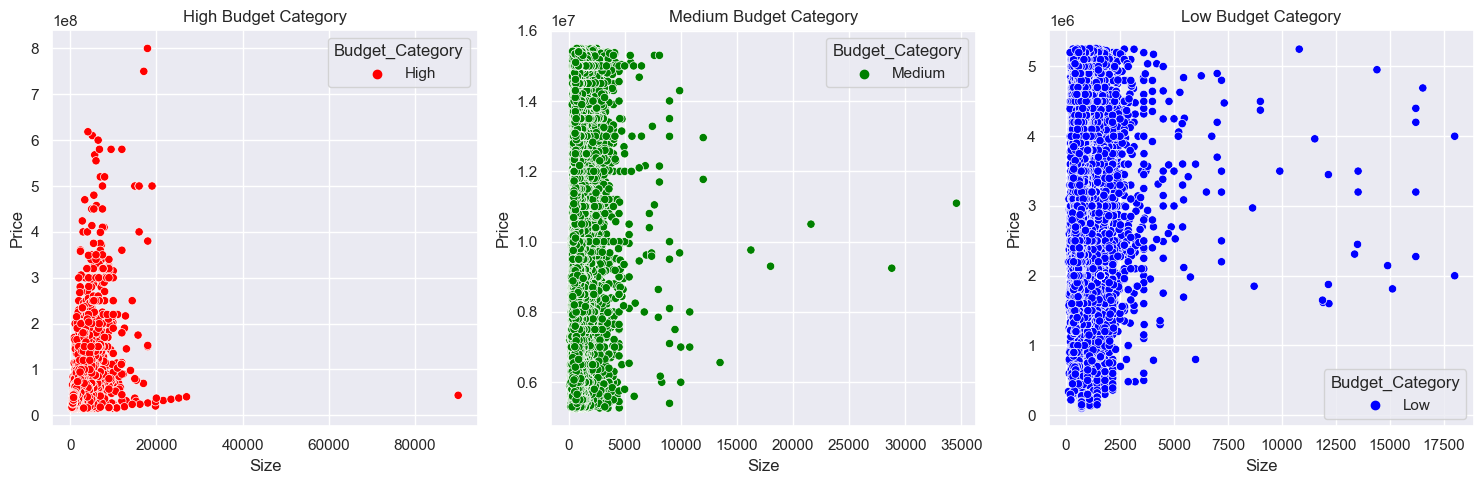

In [18]:
plt.figure(figsize=(15, 5))
custom_palette = {'Low': 'blue', 'Medium': 'green', 'High': 'red'}

plt.subplot(1, 3, 1)
sns.scatterplot(x='Size', y='Price', data=data_high, hue='Budget_Category',palette=custom_palette)
plt.title('High Budget Category')
plt.xlabel('Size')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Size', y='Price', data=data_Medium, hue='Budget_Category',palette=custom_palette)
plt.title('Medium Budget Category')
plt.xlabel('Size')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Size', y='Price', data=data_low, hue='Budget_Category',palette=custom_palette)
plt.title('Low Budget Category')
plt.xlabel('Size')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Inferences:
- For Low Budget Category there are number of choices for investors  to go with average price in that low budget category sizes to get best house
- For Medium Budget Category there are little number of choices for investors to go with  any price to get best house compared to the low budget category investors.
- For High Budget Category Investors is better to go with Lowest and below average prices  in those budget level it is not worth to go to with highest price in that high budget category. 

# Final Analysis and Conclusions:

From all the above inferences we can conclude that 
- For low budget investors Mumbai, Hyderabd and Ahmedabad can be considered as good choice according to the property size, high density properties and reasonable prices per unit area and by seeing reasonable prices they can go with the average price in their budget as reasonable
- For Medium Budget Investors  all cities are good choice except mumbai according to the property size, high denisty properties in that area and reasonable prices per unit area and they can go with above average if they can afford this is the reasonable price in that category
- For high Budget Investors Ahmedabad , Hyderabad and Lucknow is the best choices and lowest price and more over below the average price is the best choice according to that high budget levels


<u>TOOLS USED to give high level summary:</u>
1) scatter plot
2) Box plot
3) Histograms
4) Bar plot
5) Map Visuvalization

# TASK-3

## Comparing and analyzing the investment opportunities in Hyderabad and Bangalore 

Bangalore Data:
+---------------------------------+--------------+
|              Metric             |    Value     |
+---------------------------------+--------------+
| Average House Size in Bangalore |   1651.908   |
| Maximum House Size in Bangalore |    17000     |
| Minimum House Size in Bangalore |     231      |
|    Average Price in Bangalore   | 13010622.329 |
|    Maximum Price in Bangalore   |  314999776   |
|    Minimum Price in Bangalore   |    135000    |
+---------------------------------+--------------+
Hyderabad Data:
+---------------------------------+--------------+
|              Metric             |    Value     |
+---------------------------------+--------------+
| Average House Size in Hyderabad |   1992.288   |
| Maximum House Size in Hyderabad |    27000     |
| Minimum House Size in Hyderabad |     100      |
|    Average Price in Hyderabad   | 11545092.579 |
|    Maximum Price in Hyderabad   |  610000000   |
|    Minimum Price in Hyderabad   |    144000    |

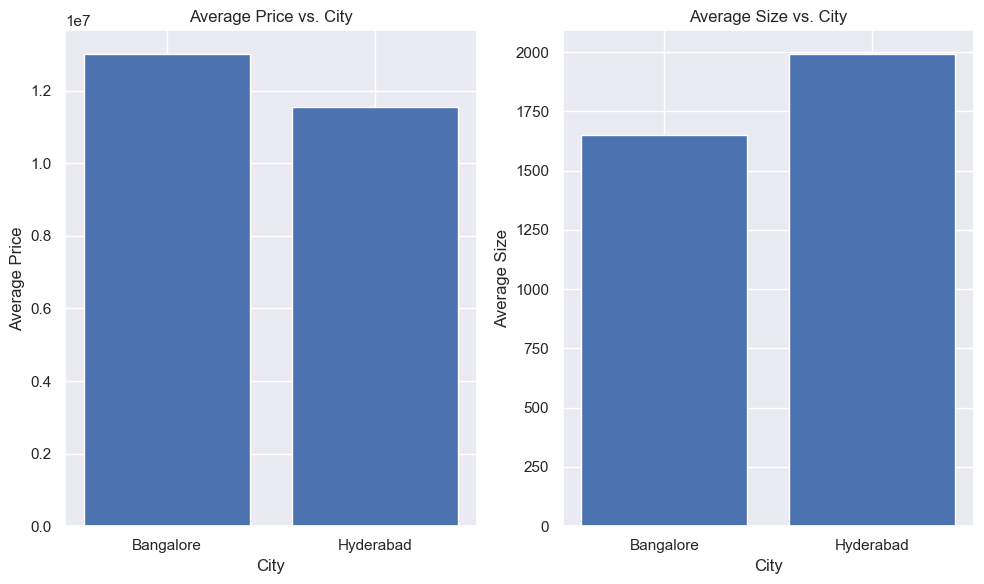

In [19]:
hyderabad_data = data[data['City_name'] == 'Hyderabad']
bangalore_data = data[data['City_name'] == 'Bangalore']

hyderabad_prices = hyderabad_data['Price']
bangalore_prices = bangalore_data['Price']

hyderabad_house_size = hyderabad_data['Size']
bangalore_house_size = bangalore_data['Size']

mean_bangalore_house_size = round(np.mean(bangalore_house_size), 3)
max_bangalore_house_size = round(bangalore_house_size.max(), 3)
min_bangalore_house_size = round(bangalore_house_size.min(), 3)

mean_hyderabad_house_size = round(np.mean(hyderabad_house_size), 3)
max_hyderabad_house_size = round(hyderabad_house_size.max(), 3)
min_hyderabad_house_size = round(hyderabad_house_size.min(), 3)

mean_bangalore_price = round(np.mean(bangalore_prices), 3)
max_value_bangalore = round( bangalore_prices.max(), 3)

mean_hyderabad_price = round(np.mean(hyderabad_prices), 3)
max_value_hyderabad = round(hyderabad_prices.max(), 3)

min_value_bangalore = round( bangalore_prices.min(), 3)
min_value_hyderabad = round( hyderabad_prices.min(), 3)

bangalore_table = PrettyTable()
bangalore_table.field_names = ["Metric", "Value"]
bangalore_table.add_row(["Average House Size in Bangalore", mean_bangalore_house_size])
bangalore_table.add_row(["Maximum House Size in Bangalore", max_bangalore_house_size])
bangalore_table.add_row(["Minimum House Size in Bangalore", min_bangalore_house_size])
bangalore_table.add_row(["Average Price in Bangalore", mean_bangalore_price])
bangalore_table.add_row(["Maximum Price in Bangalore", max_value_bangalore])
bangalore_table.add_row(["Minimum Price in Bangalore", min_value_bangalore])

hyderabad_table = PrettyTable()
hyderabad_table.field_names = ["Metric", "Value"]
hyderabad_table.add_row(["Average House Size in Hyderabad", mean_hyderabad_house_size])
hyderabad_table.add_row(["Maximum House Size in Hyderabad", max_hyderabad_house_size])
hyderabad_table.add_row(["Minimum House Size in Hyderabad", min_hyderabad_house_size])
hyderabad_table.add_row(["Average Price in Hyderabad", mean_hyderabad_price])
hyderabad_table.add_row(["Maximum Price in Hyderabad", max_value_hyderabad])
hyderabad_table.add_row(["Minimum Price in Hyderabad", min_value_hyderabad])

print("Bangalore Data:")
print(bangalore_table)

print("Hyderabad Data:")
print(hyderabad_table)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(['Bangalore', 'Hyderabad'], [bangalore_data['Price'].mean(), hyderabad_data['Price'].mean()])
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price vs. City')

plt.subplot(1, 2, 2)
plt.bar(['Bangalore', 'Hyderabad'], [bangalore_data['Size'].mean(), hyderabad_data['Size'].mean()])
plt.xlabel('City')
plt.ylabel('Average Size')
plt.title('Average Size vs. City')

plt.tight_layout()
plt.show()


## Analysis from Above data visualization:

<u>Price Distribution and Spread:</u>

  
By comparing the distribution of house prices in both cities, investors can understand the general affordability range. In Bangalore  prices are clustered around a higher range compared to Hyderabad, it indicates that the cost of real estate is generally high in Bangalore

# TASK-4

Certain investors seek to compare investment oppurtunities in less expensive and expensive localities within each city

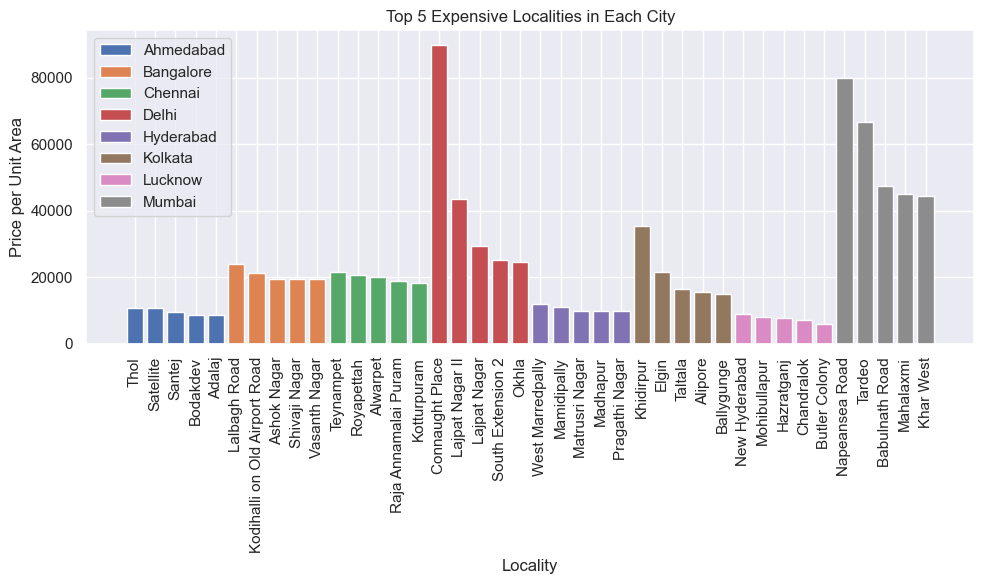

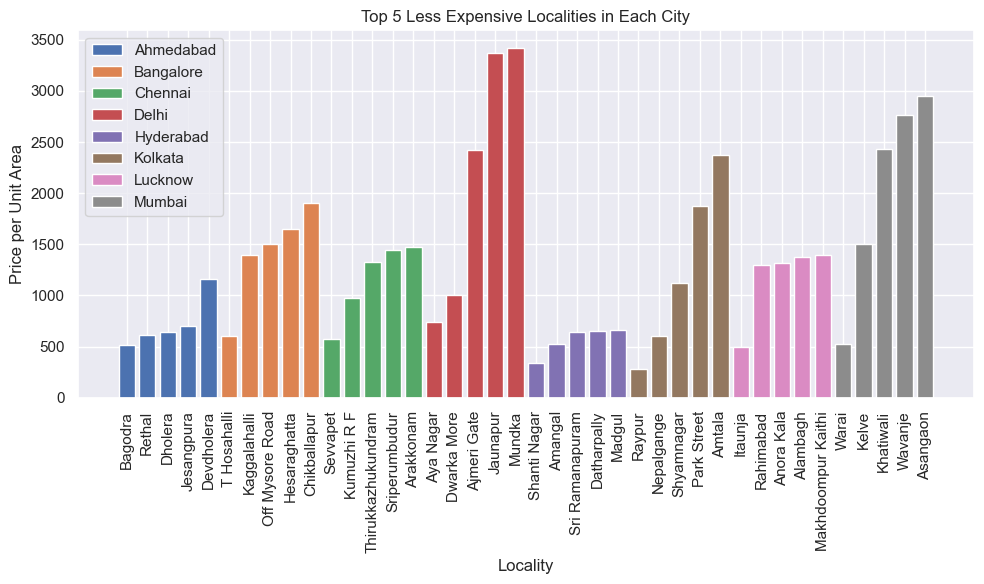

In [20]:
grouped_data = data.groupby(['City_name', 'Locality_Name'])

average_price_per_unit_area = grouped_data['Price_per_unit_area'].mean()
average_price_per_unit_area = average_price_per_unit_area.reset_index()

average_price_per_unit_area['Rank'] = average_price_per_unit_area.groupby('City_name')['Price_per_unit_area'].rank(ascending=False)
average_price_per_unit_area['Expensive'] = average_price_per_unit_area['Rank'] <= 5

average_house_size = grouped_data['Size'].mean()
average_house_size = average_house_size.reset_index()

average_house_prize = grouped_data['Price'].mean()

comparison_data = pd.merge(average_price_per_unit_area, average_house_size, on=['City_name', 'Locality_Name'], how='inner')

def categorize_investment_opportunity(row):
    if row['Expensive']:
        return "Expensive"
    else:
        return "Less Expensive"

comparison_data['Investment_Opportunity'] = comparison_data.apply(categorize_investment_opportunity, axis=1)

comparison_data.sort_values(by=['City_name', 'Price_per_unit_area'], ascending=[True, False], inplace=True)

def create_plots(data, title):
    plt.figure(figsize=(10, 6))
    for city, city_data in data.groupby('City_name'):
        plt.bar(city_data['Locality_Name'], city_data['Price_per_unit_area'], label=city)
    plt.xlabel('Locality')
    plt.ylabel('Price per Unit Area')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

expensive_localities_data = comparison_data[comparison_data['Expensive']]
less_expensive_localities_data = comparison_data.groupby('City_name').apply(lambda x: x.nsmallest(5, 'Price_per_unit_area')).reset_index(drop=True)

create_plots(expensive_localities_data, 'Top 5 Expensive Localities in Each City')
plt.show()

create_plots(less_expensive_localities_data, 'Top 5 Less Expensive Localities in Each City')
plt.show()

# Inferences from the above visuvalization
-  Investors who want to invest in expensive localities in each city they can prefer top most 5 expensive localities mentioned above according to the price per unit area, if they want to get larger properties with less price per unit area they can choose least price per unit area locality in top 5 expensive localities in each city. If the price is very high in that locality for specific city they must be the office locations or some hotspots of that city, those locations have higher chances to get higher profits comapred to the lower price per unit area localities so its totally depend upon investors to choose lower price per unit area or higher price per unit area. But  all those Top 5 expensive localities are have higher  chances to get profits in future
-  For Investors who want to invest on properties in affordable locations they can also see the preferences as like investors who want to invest on expensive localities
-  Affordable  Localities properities price per unit area starts from 500 rupees and Expensive Localities properities price per unit area starting with 10000


# TASK-5

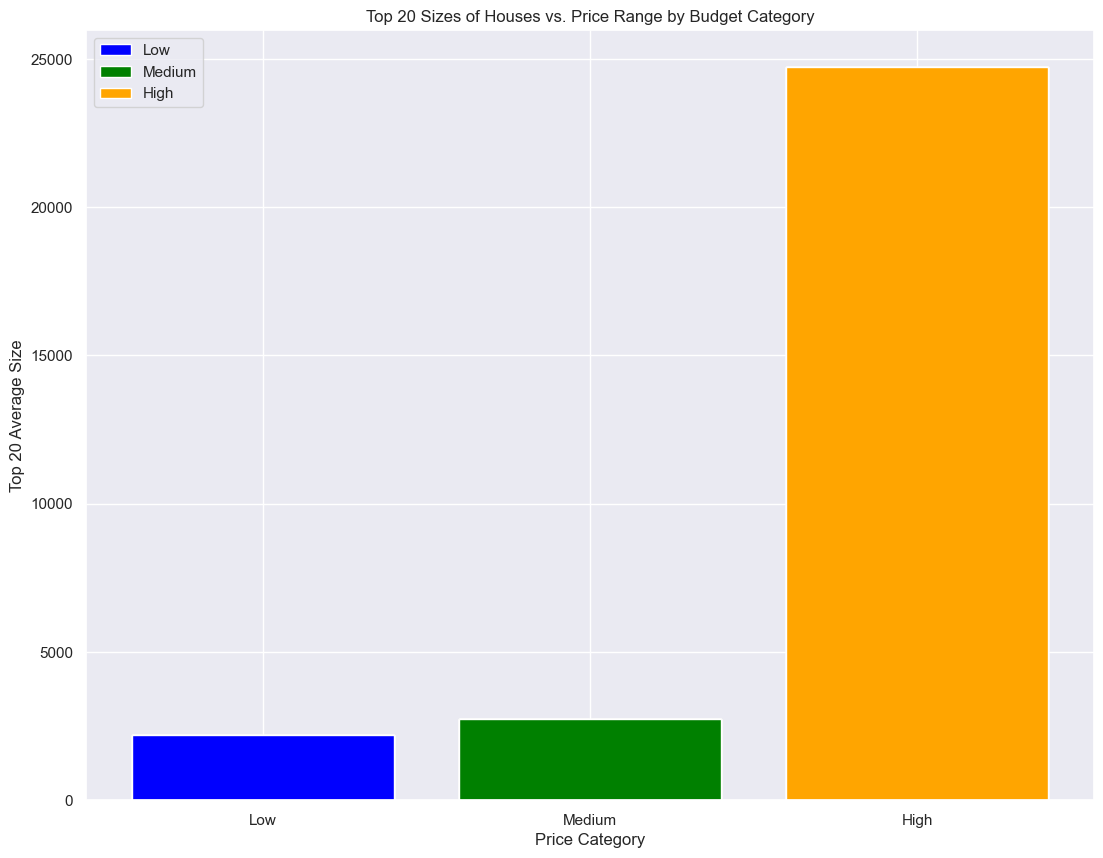

In [21]:
data['Price_Category'] = pd.cut(data['Price'], bins=[0, 500000, 1000000, float('inf')], labels=['Low', 'Medium', 'High'])
average_size_by_category = data.groupby('Price_Category')['Size'].mean()

top_20_sizes = data.groupby(['Price_Category']).apply(lambda x: x.nlargest(20, 'Size')).reset_index(drop=True)

plt.figure(figsize=(13, 10))
colors = {'Low': 'blue', 'Medium': 'green', 'High': 'orange'}

for category, color in colors.items():
    subset = top_20_sizes[top_20_sizes['Price_Category'] == category]
    plt.bar(subset['Price_Category'], subset['Size'].mean(), color=color, label=category)

plt.xlabel('Price Category')
plt.ylabel('Top 20 Average Size')
plt.title('Top 20 Sizes of Houses vs. Price Range by Budget Category')
plt.legend()
plt.grid(True)
plt.show()



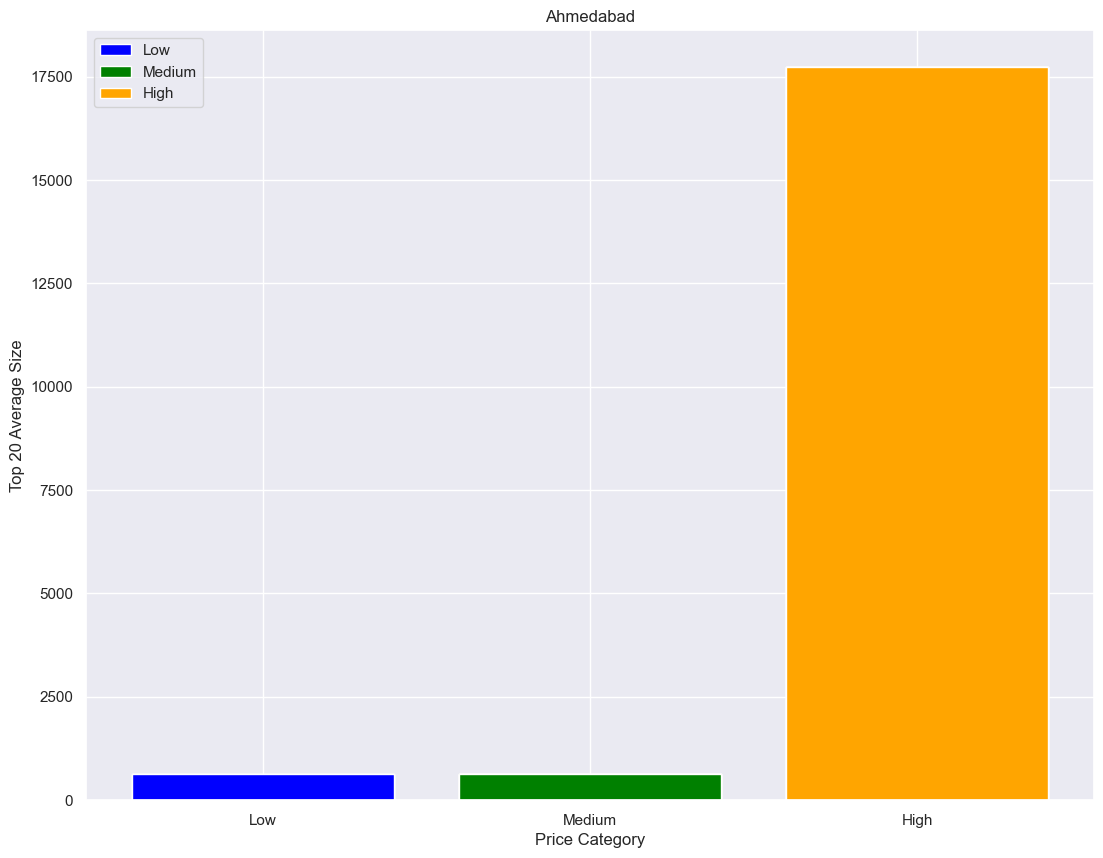

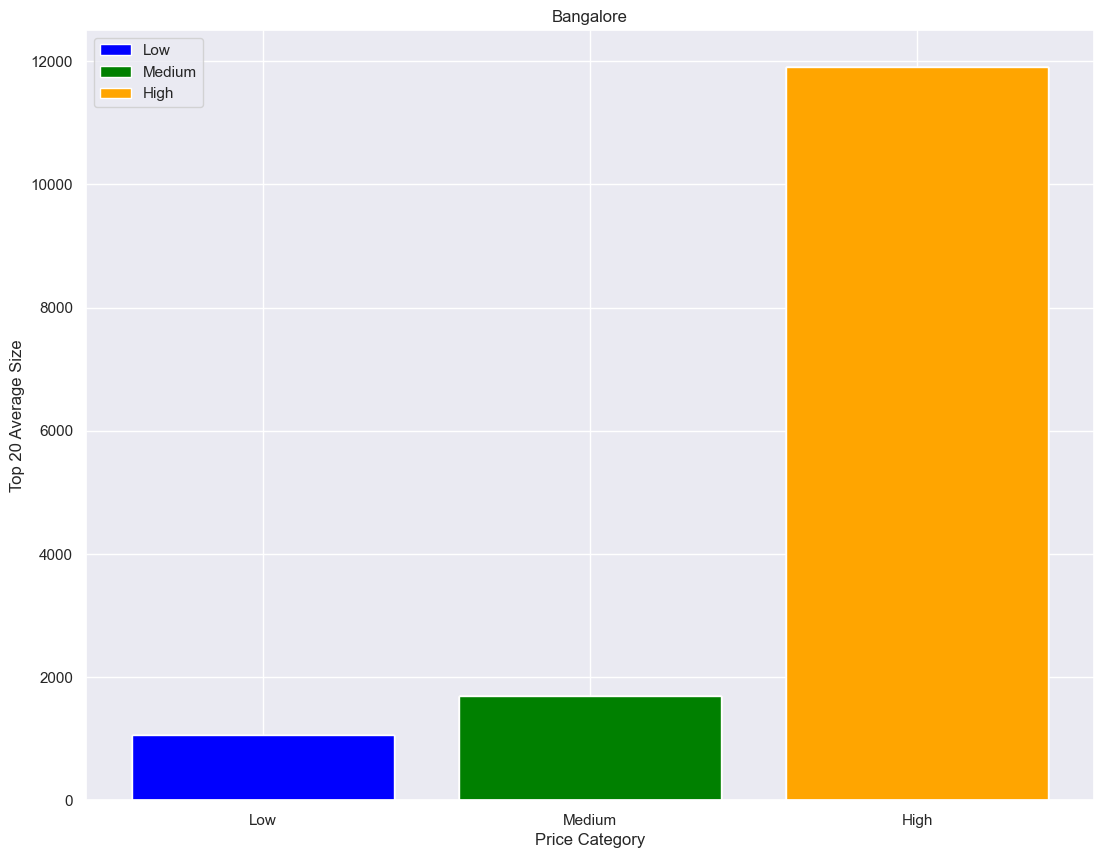

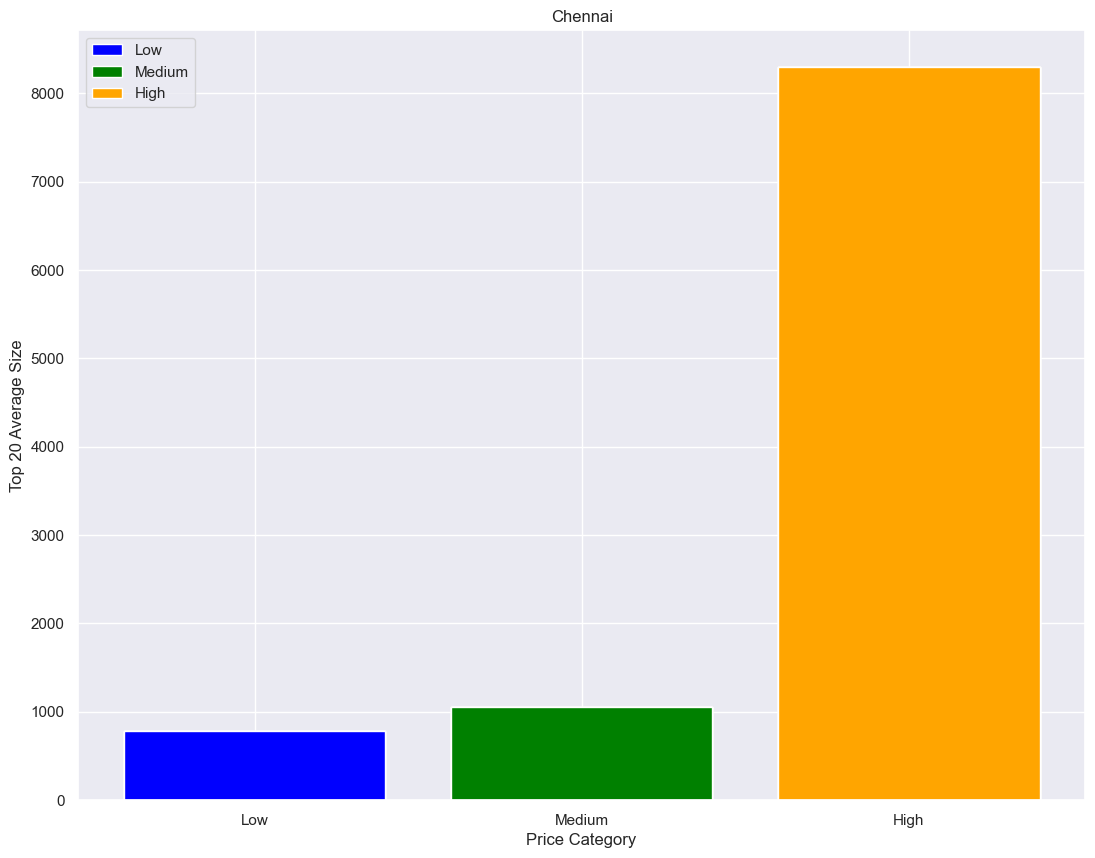

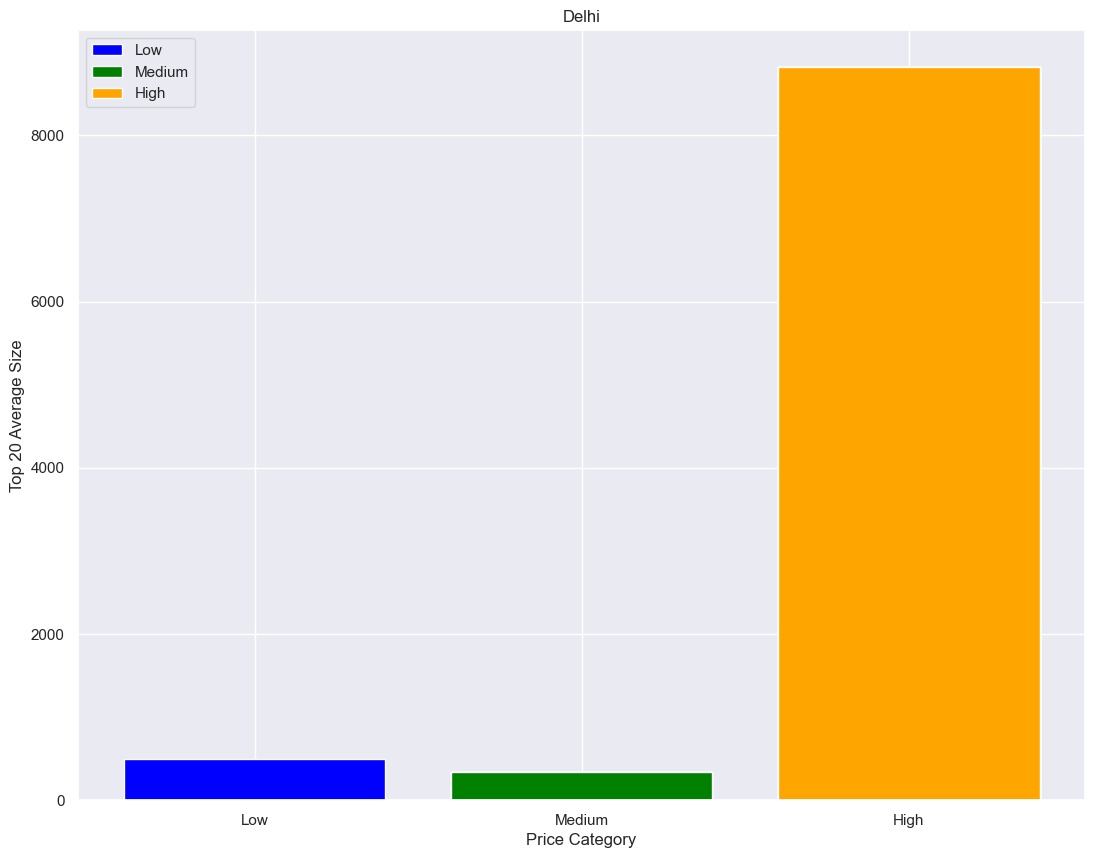

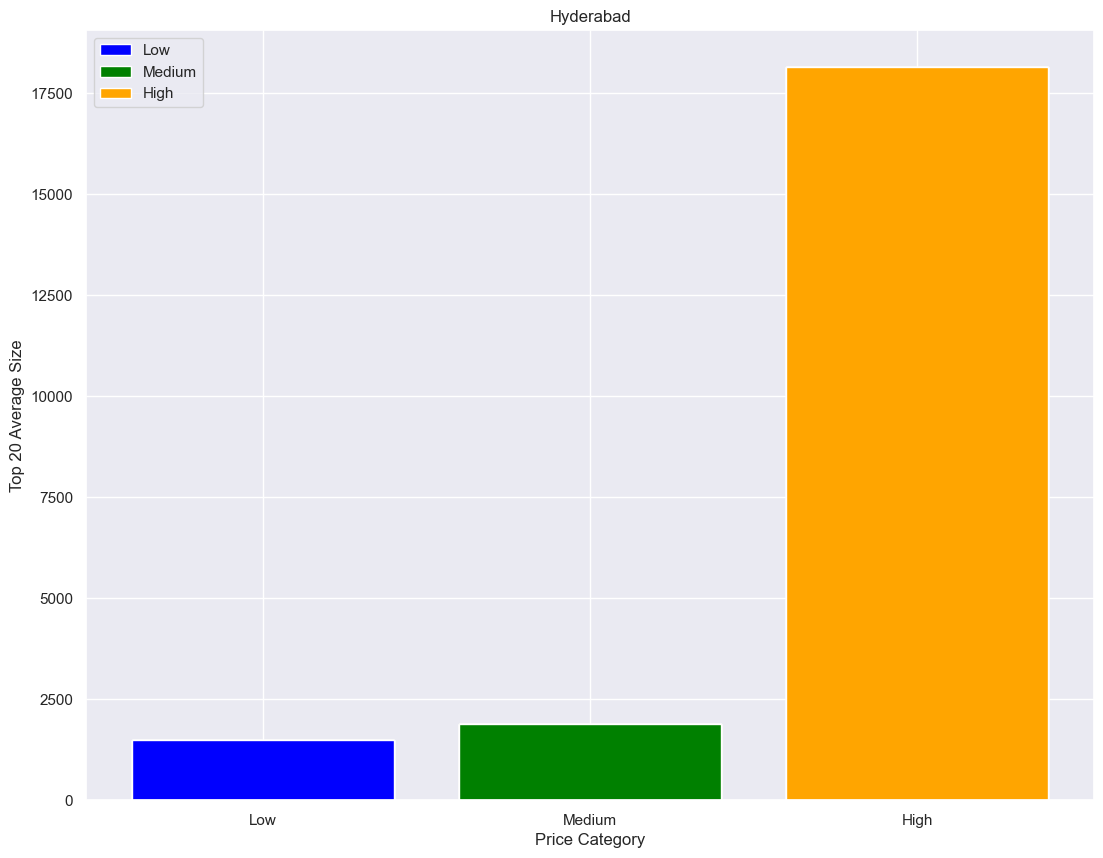

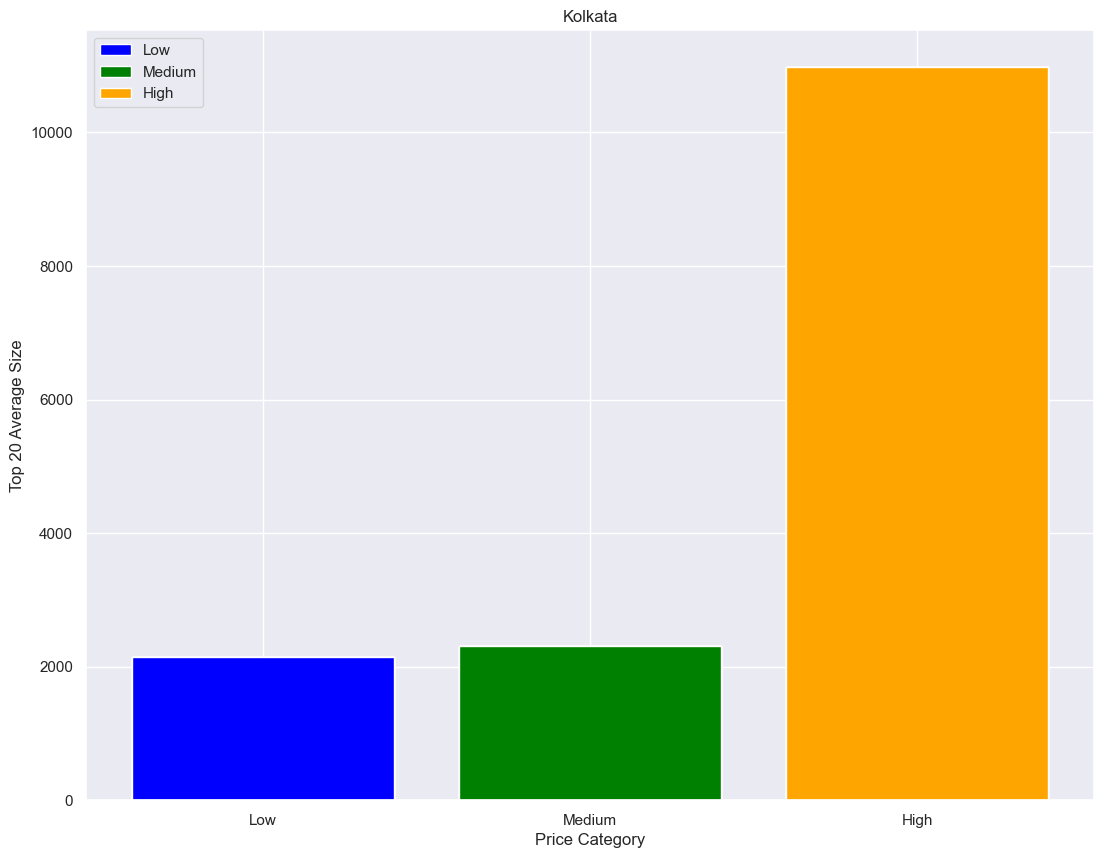

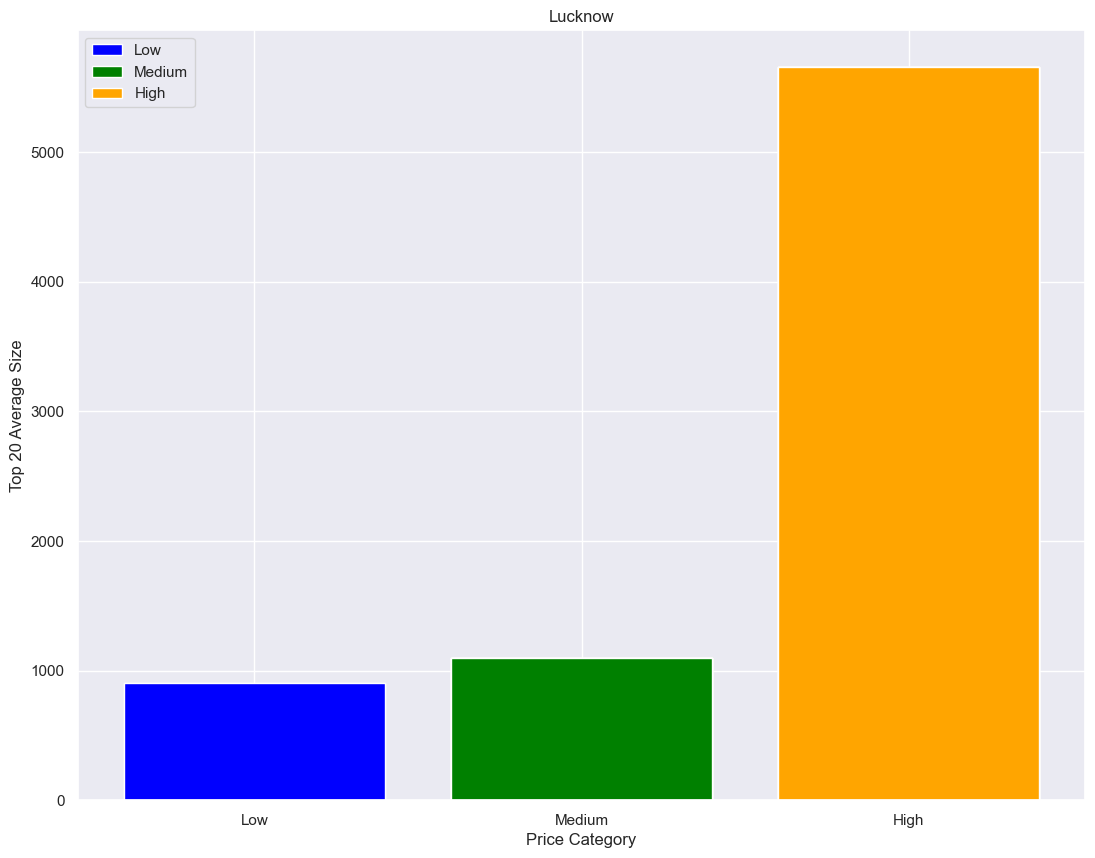

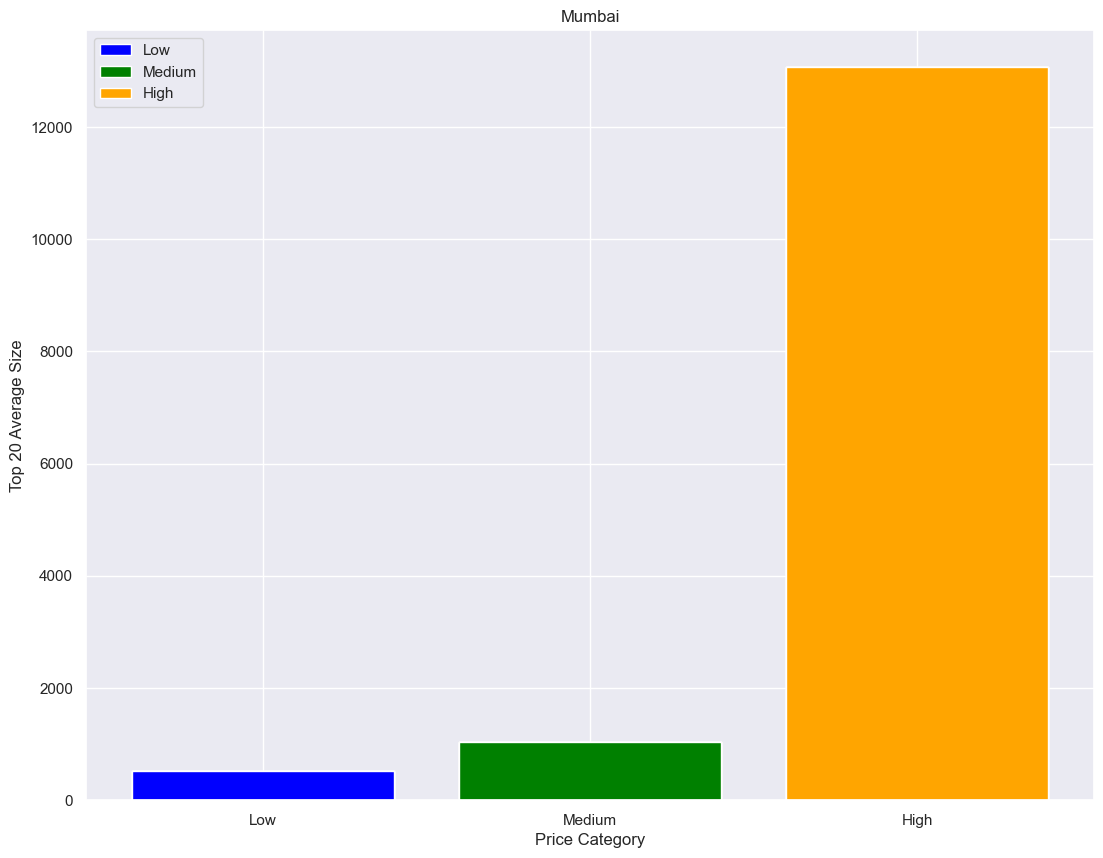

In [22]:
data['Price_Category'] = pd.cut(data['Price'], bins=[0, 500000, 1000000, float('inf')], labels=['Low', 'Medium', 'High'])

average_size_by_category = data.groupby('Price_Category')['Size'].mean()

top_20_sizes = data.groupby(['City_name', 'Price_Category']).apply(lambda x: x.nlargest(20, 'Size')).reset_index(drop=True)

colors = {'Low': 'blue', 'Medium': 'green', 'High': 'orange'}

for city in data['City_name'].unique():
    plt.figure(figsize=(13, 10))
    plt.title(f'{city}')
    for category, color in colors.items():
        subset = top_20_sizes[(top_20_sizes['Price_Category'] == category) & (top_20_sizes['City_name'] == city)]
        plt.bar(subset['Price_Category'], subset['Size'].mean(), color=color, label=category)
    plt.xlabel('Price Category')
    plt.ylabel('Top 20 Average Size')
    plt.legend()
    plt.grid(True)
    plt.show()


By seeing about graphs investors can go with larger properties with relatively lesser budgets in each city by seeing average prices in each city

#  TASK-6

In [23]:
data_fltr = data[(data['City_name'] == 'Mumbai') | (data['City_name'] == 'Ahmedabad')]
avg_price=data_fltr['Price_per_unit_area'].mean()
data_fltr=data_fltr[data_fltr['Price_per_unit_area'] > avg_price]
data_fltr=data_fltr[(data_fltr['Property_type']=="Apartment") | (data_fltr['Property_type']=="Independent Floor") | (data_fltr['Property_type']=="Independent House")]
data_fltr=data_fltr[data_fltr['is_RERA_registered']==True]
data_fltr=data_fltr[data_fltr['No_of_BHK']!='1 RK']
data_fltr=data_fltr[data_fltr['Property_building_status']=='ACTIVE']
def circle_to_map(data):
    center_coords = [data['Latitude'].mean(), data['Longitude'].mean()]
    map_center = folium.Map(location=center_coords, zoom_start=6)
    for index, row in data.iterrows():
        circle = folium.CircleMarker(location=(row['Latitude'], row['Longitude']),
                                 radius=1,  
                                 color='blue',
                                 fill=True,
                                 fill_color='blue')
        circle.add_to(map_center)
    display(map_center)
keywords = ['office', 'transport', "highway", "city areas", "cycling", "gymnastic", "meditation area"]
pattern = '|'.join(rf'\b{re.escape(keyword)}\b' for keyword in keywords)
filtered_data = data_fltr[(data_fltr['description'].str.contains(pattern, case=False, regex=True)) | (data_fltr['Sub_urban_name']=="SG Highway") | (data_fltr['Sub_urban_name']=="Ahmedabad Central")]
circle_to_map(filtered_data)

# Analysis from the above data visualization
- We got the hotspot of the offices as the central locations of both ahmedabad and Bangalore
- Bangalore have highest density office areas when compared to the bangalore 